# **INTRODUCTION**

**DataSet:** Explore the preferences, interests, habits, opinions, and fears of young people

**Dataset Source:** Kaggle [Young People Survey](https://www.kaggle.com/miroslavsabo/young-people-survey/data)

## **Objective:**

Below are the following questions are needed to be answered:

1. Given the different cluster of behaviors, does this predict the various kinds of phobias among the young people.

2. Do women fear certain phenomena significantly more than men? 

# Data prep

In [1]:
!pip install autoviz

In [2]:
# Autosave every 1 second
%autosave 1

Autosaving every 1 seconds


In [0]:
# Import Libraries
#import pandas for data manipulation and eda
import pandas as pd

#importing matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [4]:
# Load dataset
data = pd.read_csv("responses.csv")
data

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,...,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,...,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,...,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,...,1.0,5.0,3.0,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,NaN,2.0,4.0,most of the day,2.0,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,...,4.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,few hours a day,4.0,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,4.0,3.0,3.0,2.0,5.0,2.0,3.0,4.0,5.0,4.0,2.0,5.0,5.0,2.0,1.0,4.0,4.0,4.0,2.0,1.0,2.0,4.0,3.0,1.0,2.0,...,4.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,5.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,few hours a day,3.0,5.0,4.0,3.0,4.0,3,4.0,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0,4.0,1.0,5.0,2.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,2.0,5.0,4.0,1.0,1.0,5.0,4.0,5.0,5.0,2.0,2.0,...,5.0,1.0,3.0,3.0,3.0,5.0,5.0,4.0,1.0,2.0,5.0,1.0,1.0,4.0,4.0,3.0,5.0,3.0,1.0,3.0,4.0,3.0,less than an hour a day,3.0,1.0,1.0,1.0,1.0,5,3.0,27.0,183.0,80.0,5.0,male,left handed,ma

In [5]:
#check rows and columns
data.shape

(1010, 150)

In [6]:
#view all columns
data.columns.to_list()

['Music',
 'Slow songs or fast songs',
 'Dance',
 'Folk',
 'Country',
 'Classical music',
 'Musical',
 'Pop',
 'Rock',
 'Metal or Hardrock',
 'Punk',
 'Hiphop, Rap',
 'Reggae, Ska',
 'Swing, Jazz',
 'Rock n roll',
 'Alternative',
 'Latino',
 'Techno, Trance',
 'Opera',
 'Movies',
 'Horror',
 'Thriller',
 'Comedy',
 'Romantic',
 'Sci-fi',
 'War',
 'Fantasy/Fairy tales',
 'Animated',
 'Documentary',
 'Western',
 'Action',
 'History',
 'Psychology',
 'Politics',
 'Mathematics',
 'Physics',
 'Internet',
 'PC',
 'Economy Management',
 'Biology',
 'Chemistry',
 'Reading',
 'Geography',
 'Foreign languages',
 'Medicine',
 'Law',
 'Cars',
 'Art exhibitions',
 'Religion',
 'Countryside, outdoors',
 'Dancing',
 'Musical instruments',
 'Writing',
 'Passive sport',
 'Active sport',
 'Gardening',
 'Celebrities',
 'Shopping',
 'Science and technology',
 'Theatre',
 'Fun with friends',
 'Adrenaline sports',
 'Pets',
 'Flying',
 'Storm',
 'Darkness',
 'Heights',
 'Spiders',
 'Snakes',
 'Rats',
 'Agein

There are 1010 rows and 150 variables in the dataset

In [7]:
#Get summary of the data
data.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,...,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,...,3.250743,2.952381,3.302579,3.297030,2.104270,3.343564,2.672294,3.475198,3.258449,3.597815,3.158209,2.963294,3.070717,3.621272,3.518849,3.014911,3.486111,3.521825,3.461768,3.031778,3.705765,3.633831,2.973161,3.292247,2.871769,3.592040,3.551142,3.265873,2.748509,3.023833,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,1.301105,1.375677,1.214434,1.257936,1.237269,1.347173,1.327902,1.324099,1.184094,0.694700,1.411078,1.197951,0.779789,1.209489,1.311892,1.348266,1.181761,1.219436,1.133367,1.138633,1.236101,1.263523,1.258349,1.294456,1.352496,1.227098,0.920663,1.321766,1.347298,1.384127,...,1.075319,1.278387,1.483010,0.683148,1.031344,1.055348,1.002907,1.152425,1.044675,0.943806,1.093190,0.935689,1.172117,1.120903,1.103233,1.173834,1.092452,1.268173,1.118380,1.374644,0.824323,1.001617,1.222621,0.643436,1.243674,1.309913,1.170850,0.865736,1.101502,1.144365,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000

In [8]:
#Get basic info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [9]:
#check unique values
data.nunique()

Music                       5
Slow songs or fast songs    5
Dance                       5
Folk                        5
Country                     5
                           ..
Left - right handed         2
Education                   6
Only child                  2
Village - town              2
House - block of flats      2
Length: 150, dtype: int64

In [10]:
#Handpick the columns i want to work with because the dataset is so large
Phobias = data[['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes',
       'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking',
        'Loneliness', 'Health','Mood swings', 'Assertiveness', 'Life struggles', 'Happiness in life',
       'Internet usage', 'Age', 'Number of siblings','Education',
       'Only child', 'Village - town']]

Phobias.columns

Index(['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats',
       'Ageing', 'Dangerous dogs', 'Fear of public speaking', 'Loneliness',
       'Health', 'Mood swings', 'Assertiveness', 'Life struggles',
       'Happiness in life', 'Internet usage', 'Age', 'Number of siblings',
       'Education', 'Only child', 'Village - town'],
      dtype='object')

In [11]:
Phobias.shape

(1010, 22)

In [12]:
Phobias.columns

Index(['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats',
       'Ageing', 'Dangerous dogs', 'Fear of public speaking', 'Loneliness',
       'Health', 'Mood swings', 'Assertiveness', 'Life struggles',
       'Happiness in life', 'Internet usage', 'Age', 'Number of siblings',
       'Education', 'Only child', 'Village - town'],
      dtype='object')

In [13]:
#Get an overal arithmetic summary of the dataset
Phobias.describe()

,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Loneliness,Health,Mood swings,Assertiveness,Life struggles,Happiness in life,Age,Number of siblings
count,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1006.000000,1008.000000,1007.000000,1006.000000,1003.000000,1004.000000
mean,2.061569,1.973241,2.250992,2.615690,2.825871,3.027723,2.409136,2.580773,3.042616,2.803766,2.887017,3.250743,3.258449,3.518849,3.031778,3.705765,20.433699,1.297809
std,1.211354,1.164231,1.254782,1.295455,1.543695,1.500982,1.400595,1.386466,1.366829,1.214637,1.131757,1.075319,1.044675,1.103233,1.374644,0.824323,2.828840,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,19.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,20.000000,1.000000
75%,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,22.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,10.000000


From the above, the mean for Pets and dangerous dogs is essentially the highest meaning more people fear those two so we use them in our analysis and modelling.

In [14]:
Phobias.columns

Index(['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats',
       'Ageing', 'Dangerous dogs', 'Fear of public speaking', 'Loneliness',
       'Health', 'Mood swings', 'Assertiveness', 'Life struggles',
       'Happiness in life', 'Internet usage', 'Age', 'Number of siblings',
       'Education', 'Only child', 'Village - town'],
      dtype='object')

We chose to go with snakes and dangerous dogs for our analysis because they were the ones with the higher mean meaning most people were suseptible to fearing them .

In [15]:
Phobias = Phobias[['Snakes','Dangerous dogs','Loneliness', 'Health', 'Mood swings', 'Assertiveness',
       'Life struggles', 'Happiness in life', 'Internet usage', 'Age',
       'Number of siblings', 'Education', 'Only child', 'Village - town']]
Phobias.columns

Index(['Snakes', 'Dangerous dogs', 'Loneliness', 'Health', 'Mood swings',
       'Assertiveness', 'Life struggles', 'Happiness in life',
       'Internet usage', 'Age', 'Number of siblings', 'Education',
       'Only child', 'Village - town'],
      dtype='object')

In [16]:
# Rename the column names to be standard
# Editing the column names
Phobias.columns = Phobias.columns.str.lower().str.replace(' ','_')
Phobias.columns

Index(['snakes', 'dangerous_dogs', 'loneliness', 'health', 'mood_swings',
       'assertiveness', 'life_struggles', 'happiness_in_life',
       'internet_usage', 'age', 'number_of_siblings', 'education',
       'only_child', 'village_-_town'],
      dtype='object')

In [17]:
Phobias.head()

,snakes,dangerous_dogs,loneliness,health,mood_swings,assertiveness,life_struggles,happiness_in_life,internet_usage,age,number_of_siblings,education,only_child,village_-_town
0,5,3.0,3.0,1.0,3.0,1.0,1.0,4.0,few hours a day,20.0,1.0,college/bachelor degree,no,village
1,1,1.0,2.0,4.0,4.0,2.0,1.0,4.0,few hours a day,19.0,2.0,college/bachelor degree,no,city
2,1,1.0,5.0,2.0,4.0,3.0,4.0,4.0,few hours a day,20.0,2.0,secondary school,no,city
3,5,5.0,5.0,1.0,5.0,5.0,3.0,2.0,most of the day,22.0,1.0,college/bachelor degree,yes,city
4,1,4.0,3.0,3.0,2.0,4.0,2.0,3.0,few hours a day,20.0,1.0,secondary school,no,village


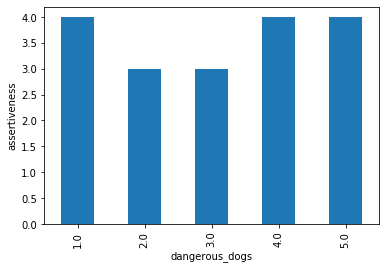

In [18]:

Phobias.groupby('dangerous_dogs')['assertiveness'].median().plot.bar()
plt.xlabel('dangerous_dogs')
plt.ylabel('assertiveness')
plt.show()

# Feature engineering

In [19]:
#feature engineering.
#Create a new column 
Phobias['phob_diff'] = Phobias.snakes - Phobias.dangerous_dogs
Phobias.head()

,snakes,dangerous_dogs,loneliness,health,mood_swings,assertiveness,life_struggles,happiness_in_life,internet_usage,age,number_of_siblings,education,only_child,village_-_town,phob_diff
0,5,3.0,3.0,1.0,3.0,1.0,1.0,4.0,few hours a day,20.0,1.0,college/bachelor degree,no,village,2.0
1,1,1.0,2.0,4.0,4.0,2.0,1.0,4.0,few hours a day,19.0,2.0,college/bachelor degree,no,city,0.0
2,1,1.0,5.0,2.0,4.0,3.0,4.0,4.0,few hours a day,20.0,2.0,secondary school,no,city,0.0
3,5,5.0,5.0,1.0,5.0,5.0,3.0,2.0,most of the day,22.0,1.0,college/bachelor degree,yes,city,0.0
4,1,4.0,3.0,3.0,2.0,4.0,2.0,3.0,few hours a day,20.0,1.0,secondary school,no,village,-3.0


In [0]:
def top_phobia(phobs_diff):
  if phobs_diff > 0:
    return 1
  elif phobs_diff < 0:
    return 0
  else:
    return 2
# Applying the result function to the dataframe
#
Phobias['top_Phobia'] = Phobias.phob_diff.apply(lambda x: top_phobia(x))


# Data cleaning

In [21]:
# Check for missing data
Phobias.isnull().sum()

snakes                0
dangerous_dogs        1
loneliness            1
health                1
mood_swings           4
assertiveness         2
life_struggles        3
happiness_in_life     4
internet_usage        0
age                   7
number_of_siblings    6
education             1
only_child            2
village_-_town        4
phob_diff             1
top_Phobia            0
dtype: int64

There are some missing values in our dataset so we need to figure out what to do with those.

In [22]:
#Check the datasets for duplicates and thereafter drop the duplicates

Phobias.duplicated().any()

False

There are no duplicated values in our dataset

In [23]:
#edit unusual column name
Phobias = Phobias.rename(columns={'village_-_town':'village-town'})
Phobias

,snakes,dangerous_dogs,loneliness,health,mood_swings,assertiveness,life_struggles,happiness_in_life,internet_usage,age,number_of_siblings,education,only_child,village-town,phob_diff,top_Phobia
0,5,3.0,3.0,1.0,3.0,1.0,1.0,4.0,few hours a day,20.0,1.0,college/bachelor degree,no,village,2.0,1
1,1,1.0,2.0,4.0,4.0,2.0,1.0,4.0,few hours a day,19.0,2.0,college/bachelor degree,no,city,0.0,2
2,1,1.0,5.0,2.0,4.0,3.0,4.0,4.0,few hours a day,20.0,2.0,secondary school,no,city,0.0,2
3,5,5.0,5.0,1.0,5.0,5.0,3.0,2.0,most of the day,22.0,1.0,college/bachelor degree,yes,city,0.0,2
4,1,4.0,3.0,3.0,2.0,4.0,2.0,3.0,few hours a day,20.0,1.0,secondary school,no,village,-3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2,3.0,4.0,4.0,3.0,2.0,4.0,4.0,few hours a day,20.0,1.0,secondary school,no,city,-1.0,0
1006,1,5.0,1.0,3.0,1.0,4.0,1.0,4.0,less than an hour a day,27.0,5.0,masters degree,no,village,-4.0,0
1007,2,1.0,4.0,3.0,2.0,1.0,5.0,3.0,most of the day,18.0,0.0,secondary school,yes,city,1.0,1
1008,3,5.0,3.0,4.0,4.0,5.0,5.0,3.0,most of the day,25.0,1.0,college/bachelor degree,no,city,-2.0,0


In [24]:
Phobias.shape

(1010, 16)

The cleaned dataset now has 1010 rows and 16 columns which is what we will be focusing on in our analysis

We now extract the clean dataset

In [0]:
Phobias.to_csv('Phobias.csv')

# Visualisations

**Exploring categorical data using WordCloud**


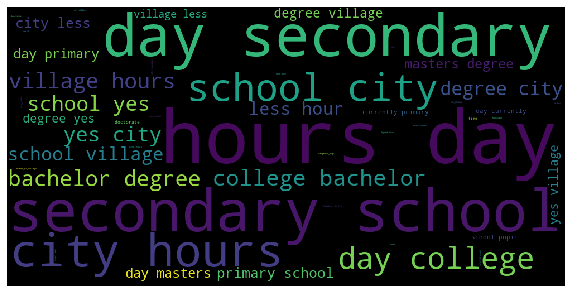

In [26]:
# Exploring categorical data using WordCloud

text = open('Phobias.csv').read()
wordcloud = WordCloud(width = 1000, height = 500).generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

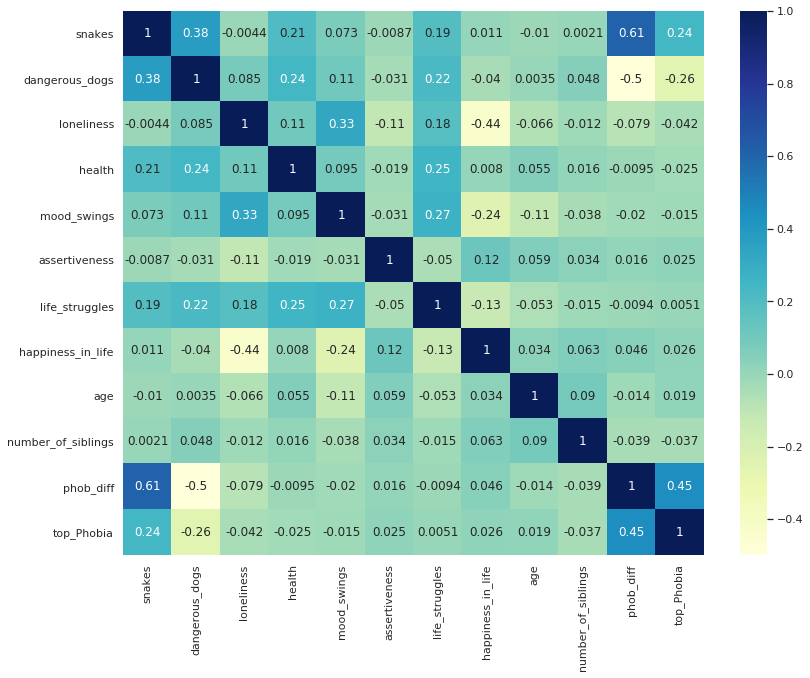

In [27]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13, 10)})
sns.heatmap(Phobias.corr(), annot=True, cmap='YlGnBu')

Values close to 1 shows for a strong correlation and from the table above, most variables are correlated as they have values close to one

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'
Shape of your Data Set: (1010, 16)
Classifying variables in data set...
    15 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Total Number of Scatter Plots = 3
Number of Cat and Continuous Vars exceeds 30, hence no Pivot or Bar Charts
Time to run AutoViz (in seconds) = 3.633


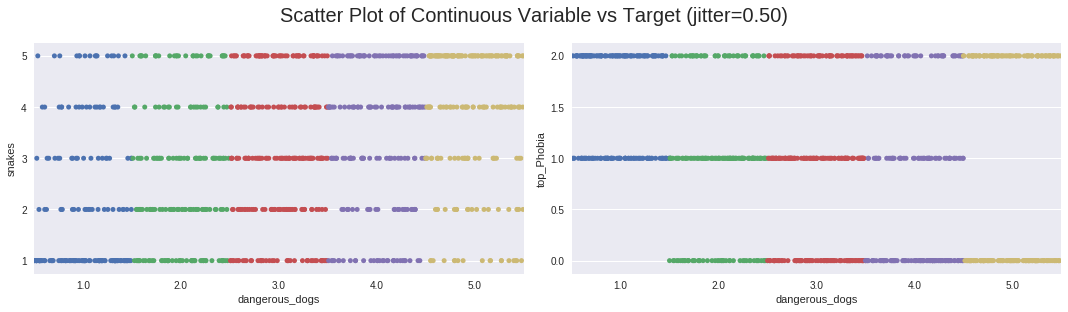

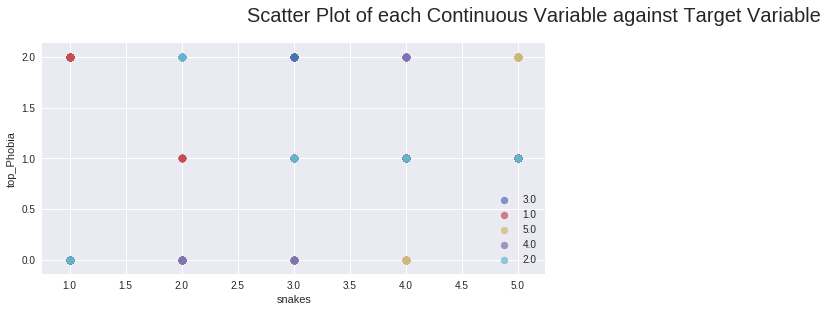

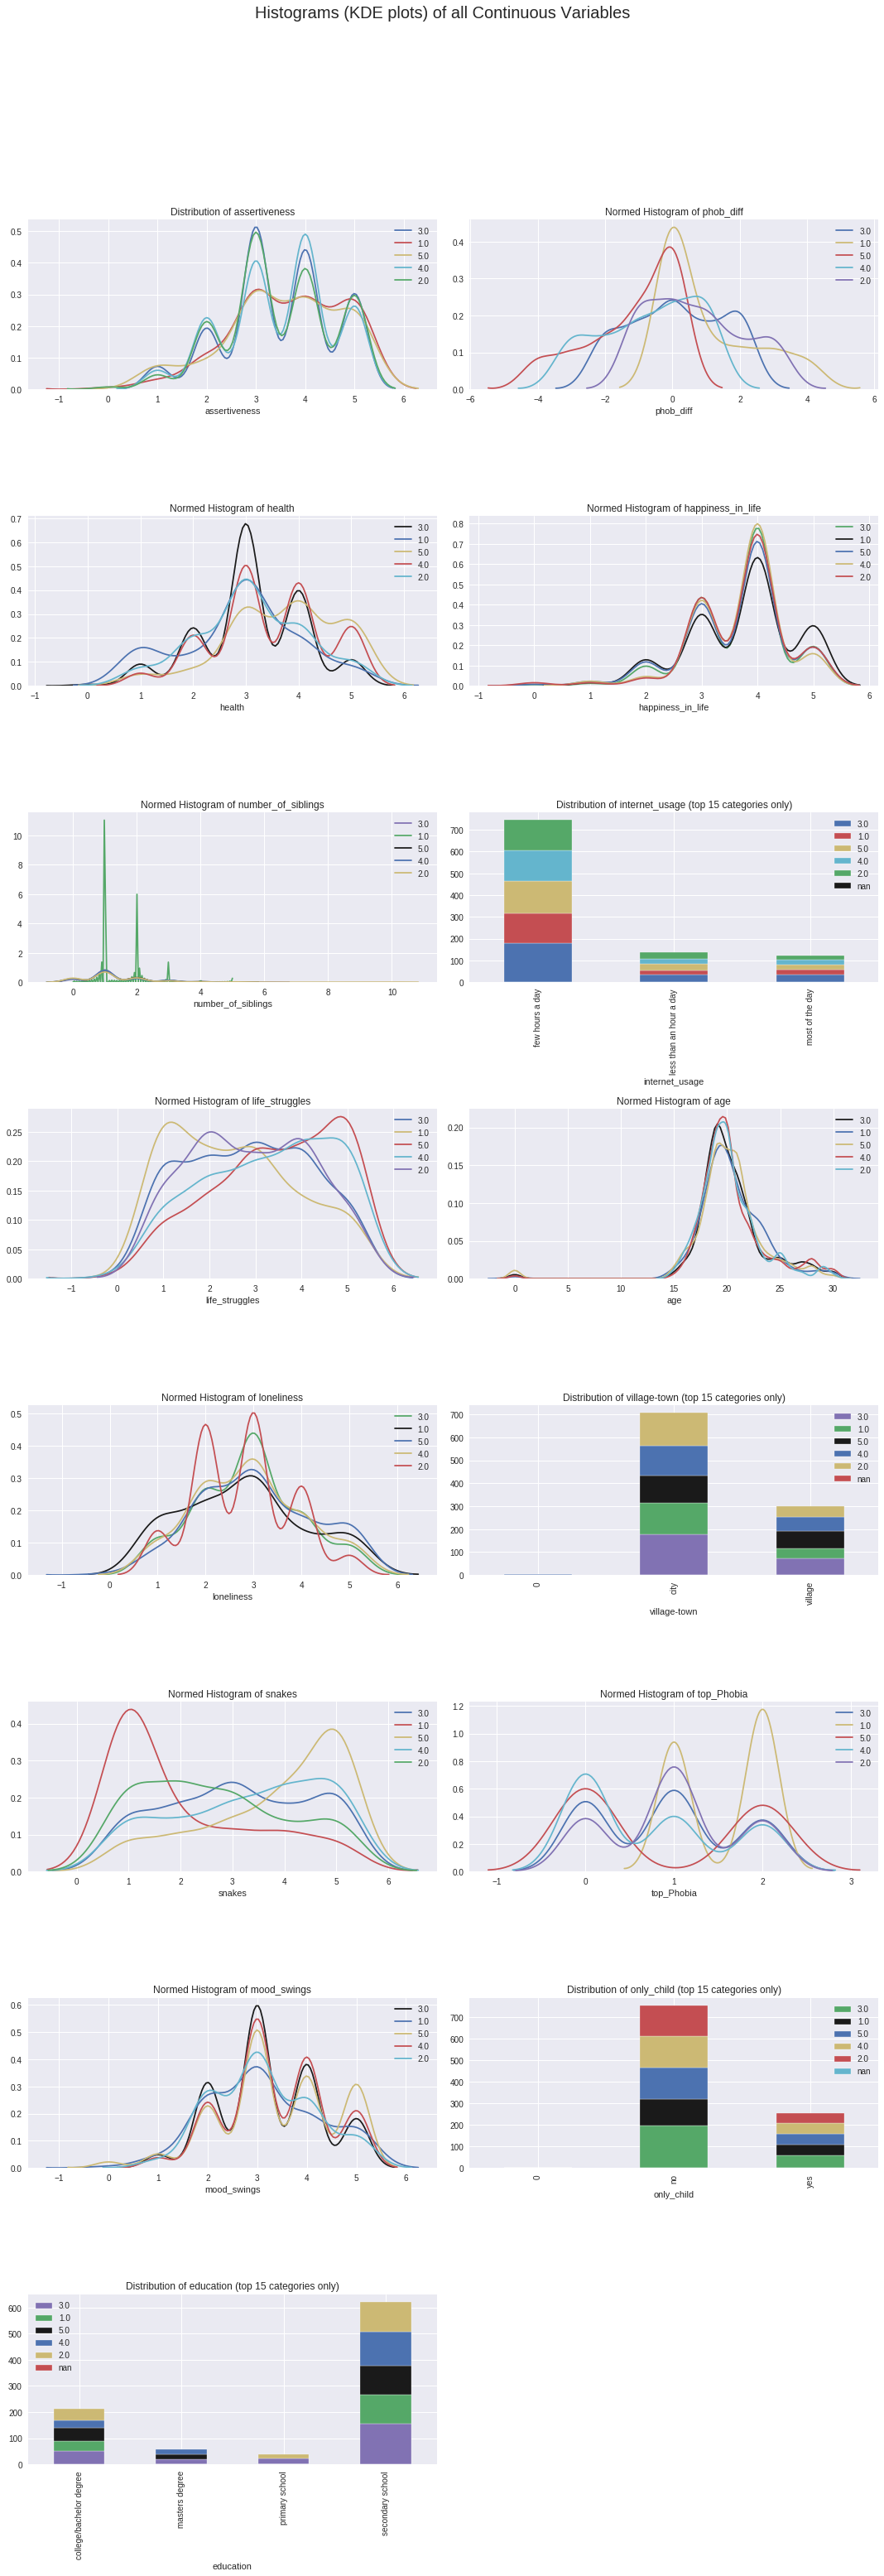

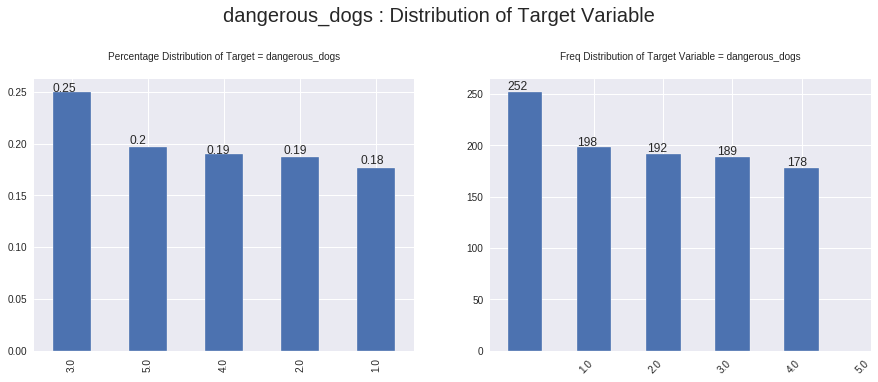

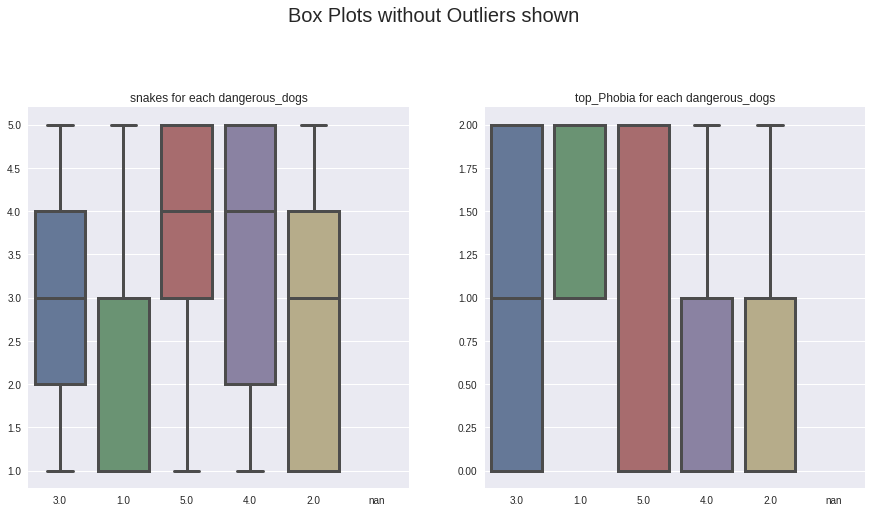

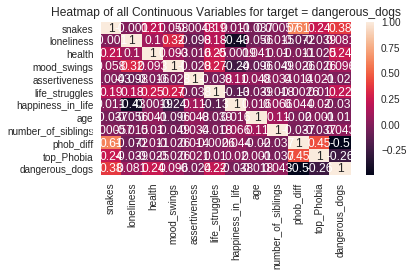

In [28]:
#visualize relationship between people with phobia of dangerous_dogs and other features in the dataset 
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

sep = ','

dft = AV.AutoViz(filename="", sep=sep, depVar='dangerous_dogs', dfte=Phobias, header=0,
                                               lowess=False, chart_format='svg', 
                                               max_rows_analyzed=15000, max_cols_analyzed=30)

Shape of your Data Set: (1010, 16)
Classifying variables in data set...
    15 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Nothing to add Plot not being added
Nothing to add Plot not being added
Number of Cat and Continuous Vars exceeds 30, hence no Pivot or Bar Charts
Time to run AutoViz (in seconds) = 2.739


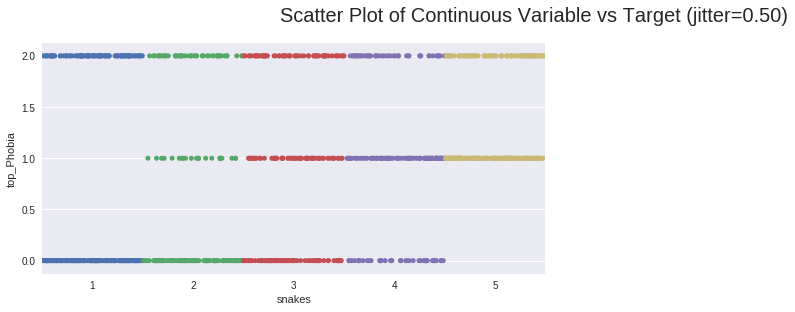

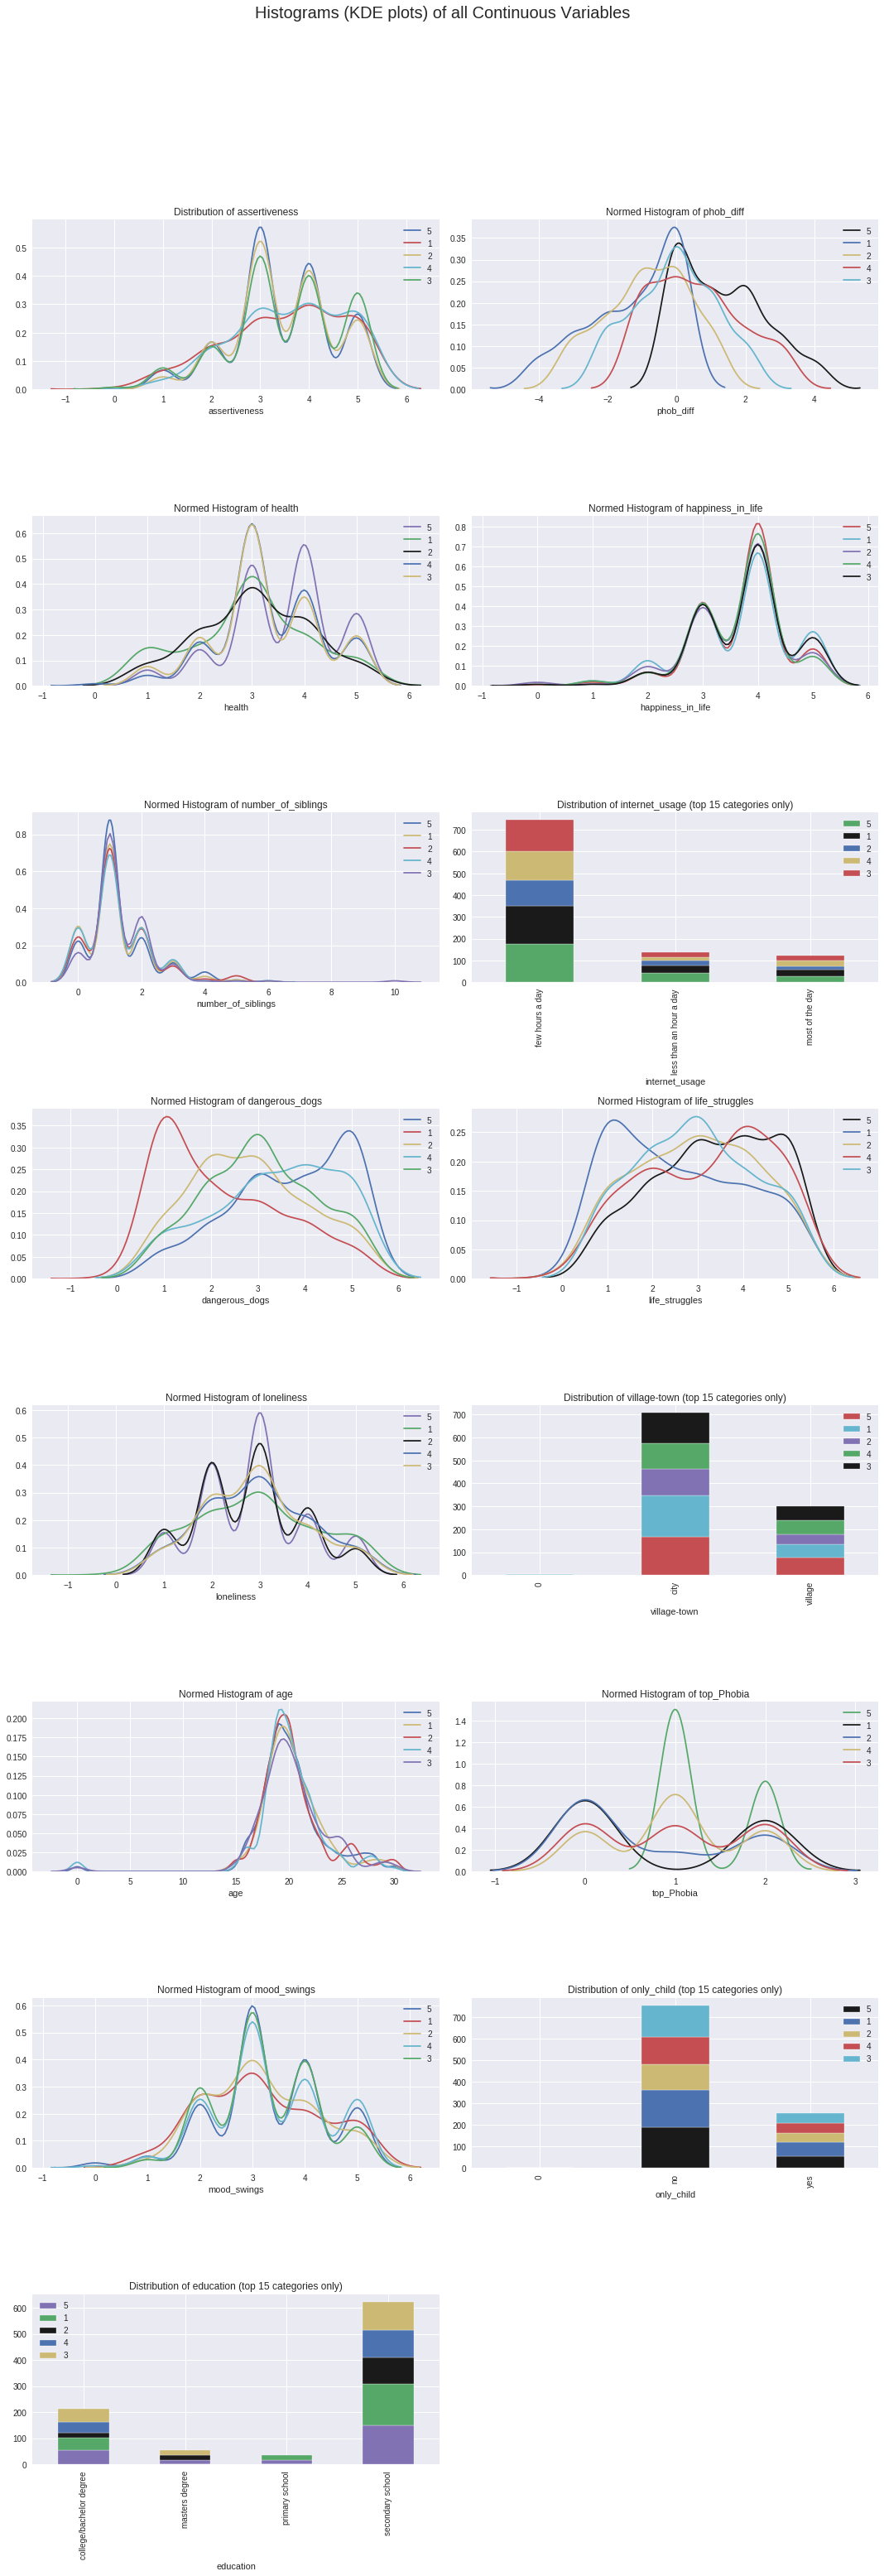

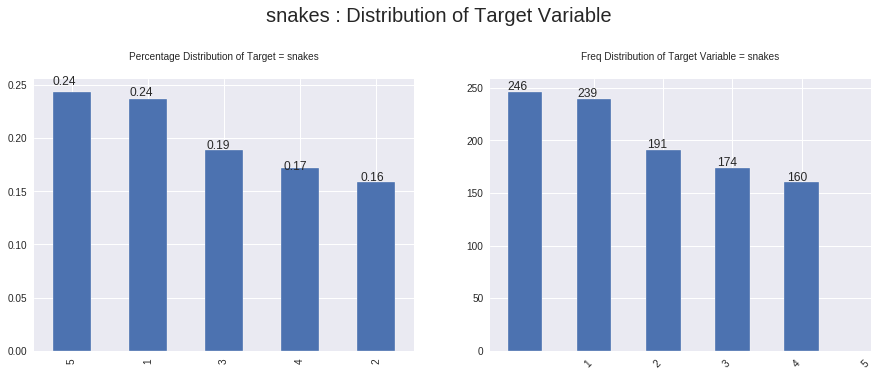

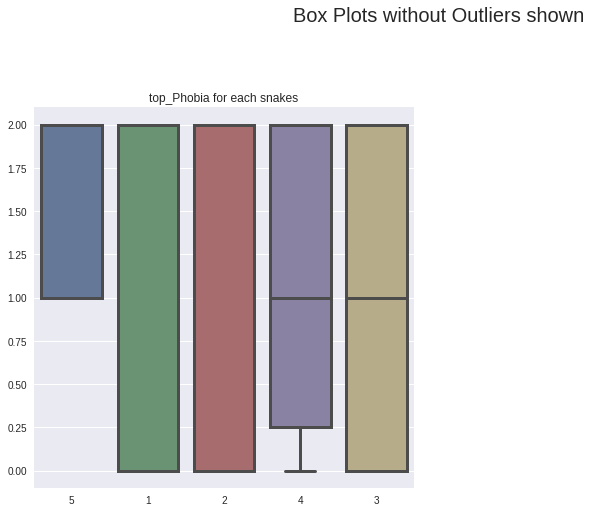

In [29]:
#visualize relationship between people with phobia of snakes and other features in the dataset 

from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

sep = ','

dft = AV.AutoViz(filename="", sep=sep, depVar='snakes', dfte=Phobias, header=0,
                                               lowess=False, chart_format='svg', 
                                               max_rows_analyzed=15000, max_cols_analyzed=30)

In [30]:
# Data preview
Phobias.head()

,snakes,dangerous_dogs,loneliness,health,mood_swings,assertiveness,life_struggles,happiness_in_life,internet_usage,age,number_of_siblings,education,only_child,village-town,phob_diff,top_Phobia
0,5,3.0,3.0,1.0,3.0,1.0,1.0,4.0,few hours a day,20.0,1.0,college/bachelor degree,no,village,2.0,1
1,1,1.0,2.0,4.0,4.0,2.0,1.0,4.0,few hours a day,19.0,2.0,college/bachelor degree,no,city,0.0,2
2,1,1.0,5.0,2.0,4.0,3.0,4.0,4.0,few hours a day,20.0,2.0,secondary school,no,city,0.0,2
3,5,5.0,5.0,1.0,5.0,5.0,3.0,2.0,most of the day,22.0,1.0,college/bachelor degree,yes,city,0.0,2
4,1,4.0,3.0,3.0,2.0,4.0,2.0,3.0,few hours a day,20.0,1.0,secondary school,no,village,-3.0,0


In [0]:
from autoviz.AutoViz_Class import AutoViz_Class

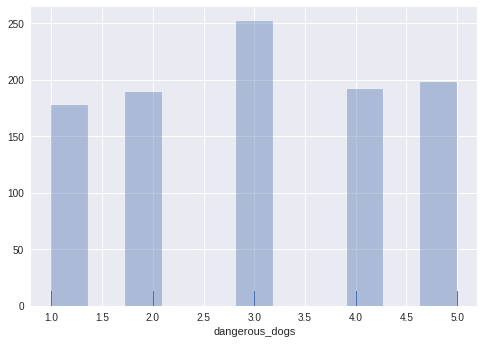

In [32]:
# Distribution of fear of danerous dogs.
#
sns.distplot(Phobias['dangerous_dogs'], kde=False, rug=True);

# sns.distplot(Phobias['dangerous_dogs'], bins=20, color = 'red')

People with phobia on snakes are evenly distributed

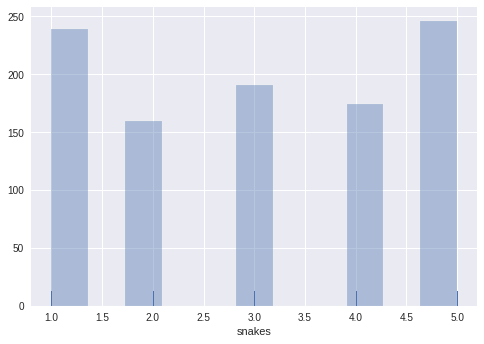

In [33]:
sns.distplot(Phobias['snakes'], kde=False, rug=True);


People with fear of snakes are evenly distributed as well

In [34]:
Phobias.columns

Index(['snakes', 'dangerous_dogs', 'loneliness', 'health', 'mood_swings',
       'assertiveness', 'life_struggles', 'happiness_in_life',
       'internet_usage', 'age', 'number_of_siblings', 'education',
       'only_child', 'village-town', 'phob_diff', 'top_Phobia'],
      dtype='object')

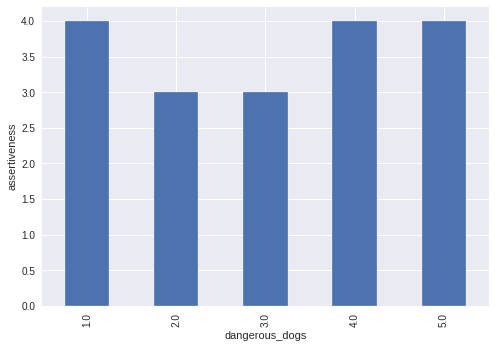

In [35]:
Phobias.groupby('dangerous_dogs')['assertiveness'].median().plot.bar()
plt.xlabel('dangerous_dogs')
plt.ylabel('assertiveness')
plt.show()

People with extremely high phobia of snakes(5.0 and 4.0 ) are highly assertive. and extremely low phobias(1.0)

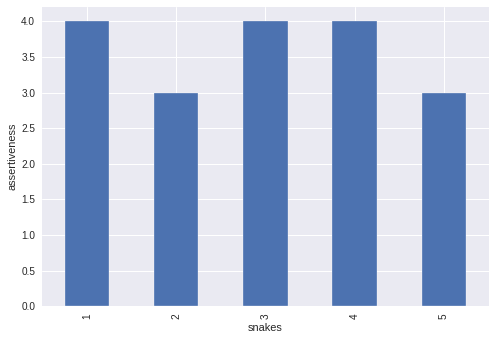

In [36]:
Phobias.groupby('snakes')['assertiveness'].median().plot.bar()
plt.xlabel('snakes')
plt.ylabel('assertiveness')
plt.show()

People with phobia of snakes are generally of high and low assertiveness overall

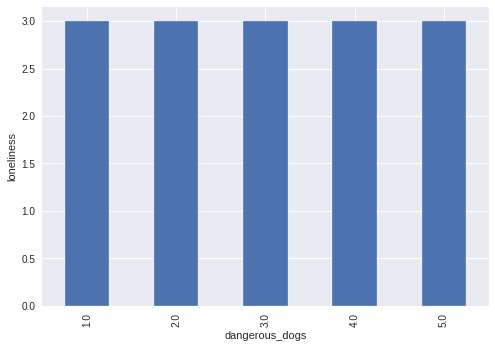

In [76]:
Phobias.groupby('dangerous_dogs')['loneliness'].median().plot.bar()
plt.xlabel('dangerous_dogs')
plt.ylabel('loneliness')
plt.show()

People who fear dangerous dogs and snakes are generally lonely overall as seen above and below

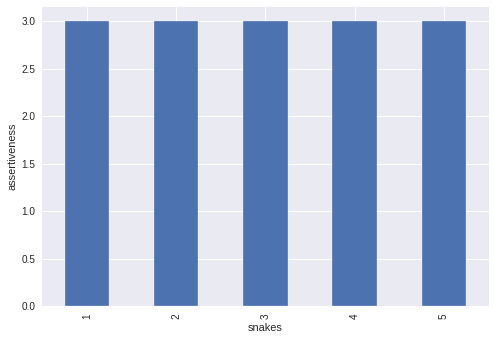

In [38]:
Phobias.groupby('snakes')['loneliness'].median().plot.bar()
plt.xlabel('snakes')
plt.ylabel('assertiveness')
plt.show()

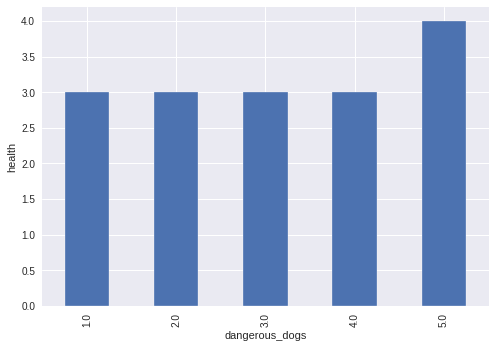

In [39]:
Phobias.groupby('dangerous_dogs')['health'].median().plot.bar()
plt.xlabel('assertiveness')
plt.ylabel('health')
plt.show()

Generally people who fear dangerous dogs are of an average health level as shown above

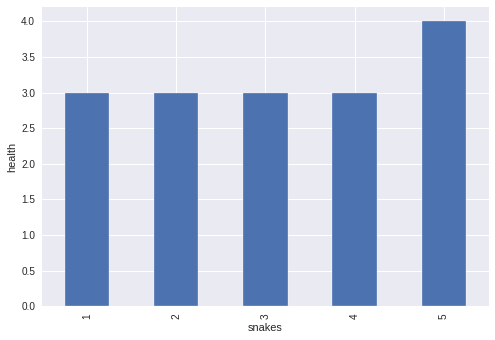

In [40]:
Phobias.groupby('snakes')['health'].median().plot.bar()
plt.xlabel('snakes')
plt.ylabel('health')
plt.show()

Generally people who fear snakes are of an average health level as well as shown above

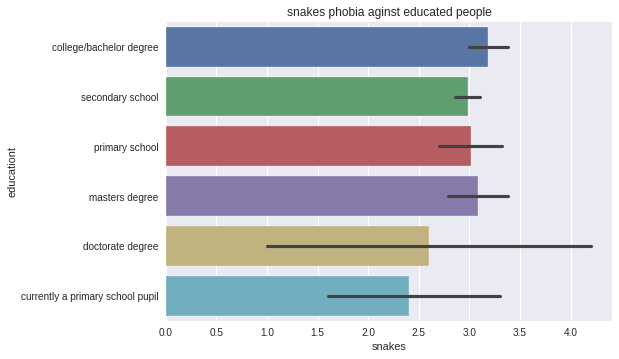

In [43]:
ax = sns.barplot(x='snakes', y='education', data=Phobias)
ax.set(xlabel='snakes',
       ylabel='educationt',
       title='snakes phobia aginst educated people')
plt.show()

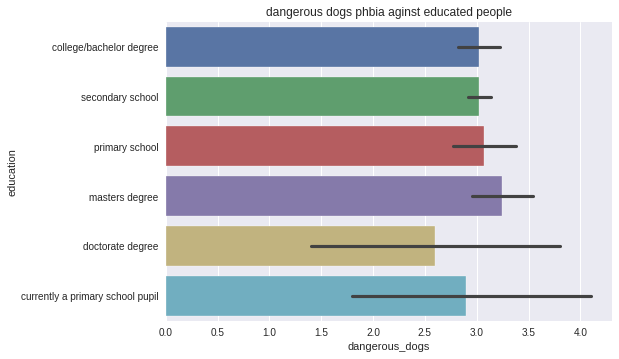

In [44]:
ax = sns.barplot(x='dangerous_dogs', y='education', data=Phobias)
ax.set(xlabel='dangerous_dogs',
       ylabel='education',
       title='dangerous dogs phbia aginst educated people')
plt.show()

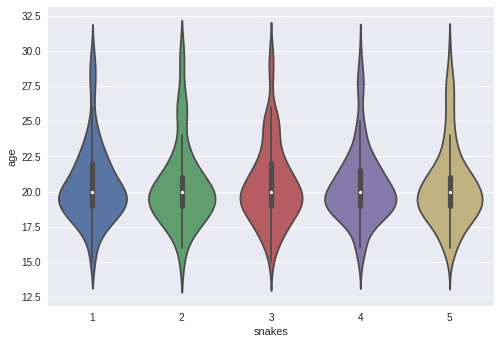

In [45]:

sns.violinplot(x='snakes', y='age', data=Phobias)

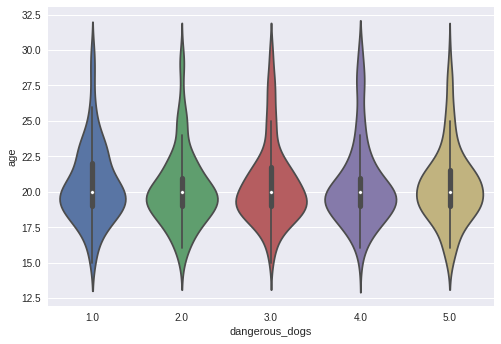

In [46]:
ax = sns.violinplot(x="dangerous_dogs", y="age", data=Phobias)

In [47]:
Phobias.columns

Index(['snakes', 'dangerous_dogs', 'loneliness', 'health', 'mood_swings',
       'assertiveness', 'life_struggles', 'happiness_in_life',
       'internet_usage', 'age', 'number_of_siblings', 'education',
       'only_child', 'village-town', 'phob_diff', 'top_Phobia'],
      dtype='object')

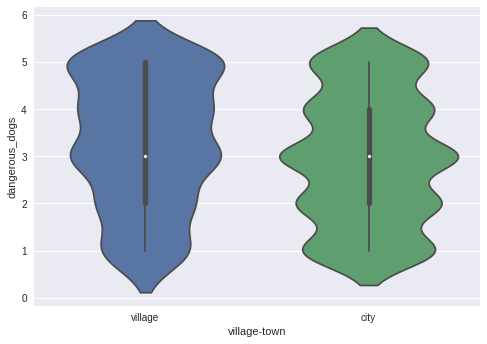

In [48]:
# sns.catplot(x='snakes', y='age', data=Phobias)
ax = sns.violinplot(x='village-town', y="dangerous_dogs", data=Phobias)

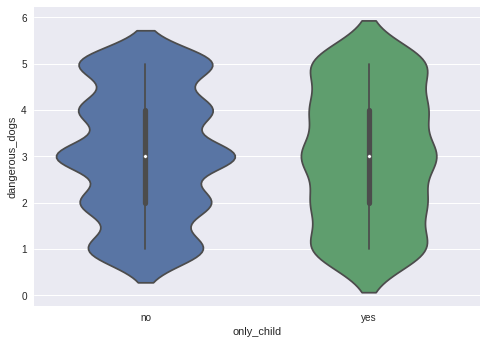

In [49]:

ax = sns.violinplot(x='only_child', y="dangerous_dogs", data=Phobias)

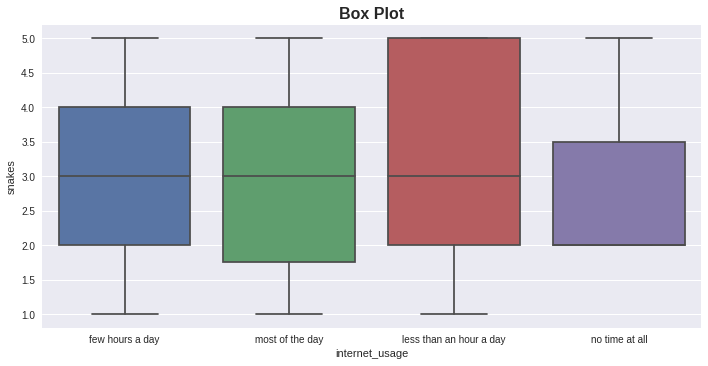

In [50]:
# Plotting
sns.catplot(x='internet_usage', y='snakes', data=Phobias, kind='box', aspect=2)
plt.title('Box Plot', weight='bold', fontsize=16)
plt.show()


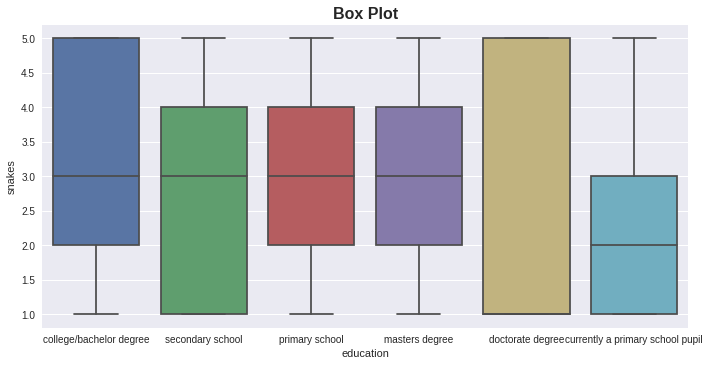

In [51]:
sns.catplot(x='education', y='snakes', data=Phobias, kind='box', aspect=2)
plt.title('Box Plot', weight='bold', fontsize=16)
plt.show()
# education

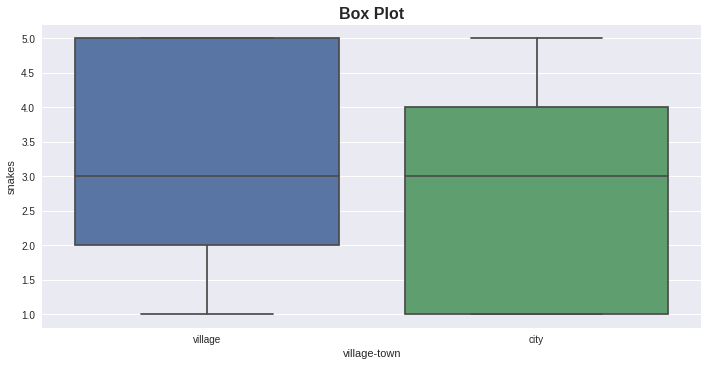

In [52]:
sns.catplot(x='village-town', y='snakes', data=Phobias, kind='box', aspect=2)
plt.title('Box Plot', weight='bold', fontsize=16)
plt.show()
# education

Modelling

In [53]:
Phobias.head()

,snakes,dangerous_dogs,loneliness,health,mood_swings,assertiveness,life_struggles,happiness_in_life,internet_usage,age,number_of_siblings,education,only_child,village-town,phob_diff,top_Phobia
0,5,3.0,3.0,1.0,3.0,1.0,1.0,4.0,few hours a day,20.0,1.0,college/bachelor degree,no,village,2.0,1
1,1,1.0,2.0,4.0,4.0,2.0,1.0,4.0,few hours a day,19.0,2.0,college/bachelor degree,no,city,0.0,2
2,1,1.0,5.0,2.0,4.0,3.0,4.0,4.0,few hours a day,20.0,2.0,secondary school,no,city,0.0,2
3,5,5.0,5.0,1.0,5.0,5.0,3.0,2.0,most of the day,22.0,1.0,college/bachelor degree,yes,city,0.0,2
4,1,4.0,3.0,3.0,2.0,4.0,2.0,3.0,few hours a day,20.0,1.0,secondary school,no,village,-3.0,0


In [0]:
from sklearn import preprocessing 


In [55]:
Phobias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 16 columns):
snakes                1010 non-null int64
dangerous_dogs        1009 non-null float64
loneliness            1009 non-null float64
health                1009 non-null float64
mood_swings           1006 non-null float64
assertiveness         1008 non-null float64
life_struggles        1007 non-null float64
happiness_in_life     1006 non-null float64
internet_usage        1010 non-null object
age                   1003 non-null float64
number_of_siblings    1004 non-null float64
education             1009 non-null object
only_child            1008 non-null object
village-town          1006 non-null object
phob_diff             1009 non-null float64
top_Phobia            1010 non-null int64
dtypes: float64(10), int64(2), object(4)
memory usage: 126.4+ KB


In [0]:
# Import label encoder 
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
le = preprocessing.LabelEncoder()
categorical_cols = ['education', 'only_child', 'internet_usage', 'village-town']
Phobias[categorical_cols] = Phobias[categorical_cols].astype('str')
# apply label encoder on categorical feature columns
Phobias[categorical_cols] = Phobias[categorical_cols].apply(lambda Phobias: le.fit_transform(Phobias))


In [57]:
Phobias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 16 columns):
snakes                1010 non-null int64
dangerous_dogs        1009 non-null float64
loneliness            1009 non-null float64
health                1009 non-null float64
mood_swings           1006 non-null float64
assertiveness         1008 non-null float64
life_struggles        1007 non-null float64
happiness_in_life     1006 non-null float64
internet_usage        1010 non-null int64
age                   1003 non-null float64
number_of_siblings    1004 non-null float64
education             1010 non-null int64
only_child            1010 non-null int64
village-town          1010 non-null int64
phob_diff             1009 non-null float64
top_Phobia            1010 non-null int64
dtypes: float64(10), int64(6)
memory usage: 126.4 KB


In [0]:
Phobias = Phobias.dropna()

In [59]:
Phobias.columns

Index(['snakes', 'dangerous_dogs', 'loneliness', 'health', 'mood_swings',
       'assertiveness', 'life_struggles', 'happiness_in_life',
       'internet_usage', 'age', 'number_of_siblings', 'education',
       'only_child', 'village-town', 'phob_diff', 'top_Phobia'],
      dtype='object')

In [0]:
# y =Phobias['top_Phobia'].values
# # x = Phobias.drop(['top_Phobia','snakes','dangerous_dogs','phob_diff'], axis = 1)



# test_features = Phobias.columns.to_list()
# test_features.remove('top_Phobia')

# # We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
# X = Phobias[test_features].values
x=Phobias[['loneliness', 'health', 'mood_swings',
       'assertiveness', 'life_struggles', 'happiness_in_life',
       'internet_usage', 'age', 'number_of_siblings', 'education',
       'only_child', 'village-town']]

y=Phobias['top_Phobia']

In [0]:
#Split the data into a training set and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)




In [0]:
# from sklearn.model_selection import train_test_split

# # Split the independent and dependent variables
# # We want to predict if someone is a social drinker, so let's use that column as our Y 
# y = data['Hit target'].values


# test_features = data.columns.to_list()
# test_features.remove('Hit target')

# # We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
# X = data[test_features].values

# # Train using 80% of the data.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestClassifier(n_estimators = 500)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)




In [68]:
import numpy as np
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame

,Actual,Predicted
0,0,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
192,2,1
193,0,2
194,0,0
195,0,2


As above we compare actual values vs predicted by model

Below Let's assess how well our random forest is doing.


In [73]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', (metrics.r2_score(y_test, y_pred)))


Mean Absolute Error: 0.8121827411167513
Mean Squared Error: 1.2284263959390862
Root Mean Squared Error: 1.1083439880917323
R2 Score: -0.7925251917581593


As above, we can see that our model is doing so bad . In my opinion probably the features(independent variables) are not really related in the best way to the dependent variable(the two selected phobias). In that case dependent variables are not as good a selection for the modelling despite having chosen them based of their high mean compared to other features . The model doesnt get any better despite trying to improve it so its definitely a dataset problem . A better dataset would produce a better model. 

### Conclusion

Overall, phobias and certain lifestyle features are relates in various ways as shown above